# Santander Customer Satisfaction
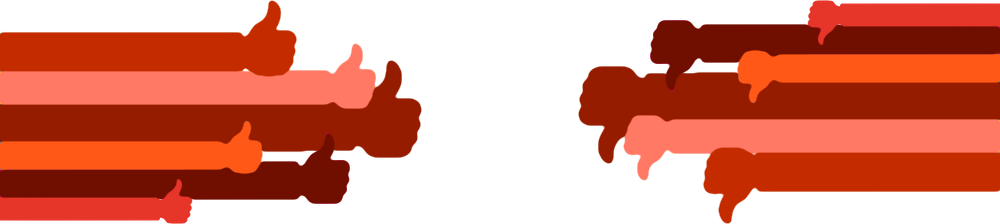

# 1. 파일 불러오기  & 기본 환경설정

In [ ]:
import numpy as np # 넘파이
import pandas as pd # 판다스
import sklearn #사이킷런
import matplotlib.pyplot as plt #그래프1
import seaborn as sns  # 그래프2
from sklearn.ensemble import RandomForestClassifier # 모델1
from sklearn.linear_model import LogisticRegression  # 모델2
from sklearn.metrics import roc_auc_score #성능평가
from sklearn.model_selection import train_test_split, cross_validate #데이터분리, 교차검증
from sklearn.pipeline import Pipeline #파이프라인
from sklearn.preprocessing import StandardScaler #스케일링

In [ ]:
!pip install feature-engine # 특성 추출 모듈 

In [ ]:
from feature_engine.selection import (
    DropDuplicateFeatures,
    DropConstantFeatures,
    DropDuplicateFeatures,
    DropCorrelatedFeatures,
    SmartCorrelatedSelection,
    SelectByShuffling,
    SelectBySingleFeaturePerformance,
    RecursiveFeatureElimination,
)

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/DATA/Santander Customer Satisfaction_train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/DATA/Santander Customer Satisfaction_test.csv') 

In [ ]:
train_df.shape, test_df.shape

((76020, 370), (75818, 369))

In [ ]:
#ID 분리
train_id= train_df['ID'] 
test_id= test_df['ID'] 

train_df.drop(['ID'], axis=1, inplace= True)
test_df.drop(['ID'], axis=1, inplace= True)

In [ ]:
y_train= train_df['TARGET']
X_train= train_df.drop('TARGET', axis=1)
X_test = test_df

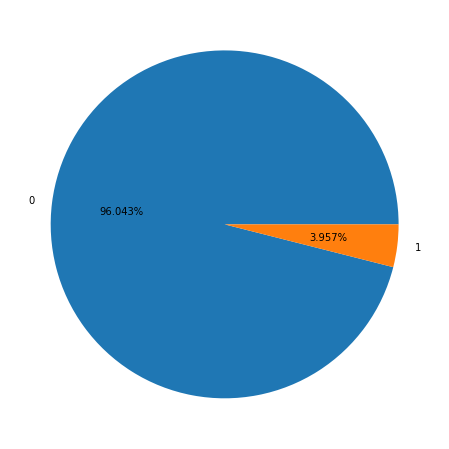

Number of Positive data points are: 3008  (3.957%)
Number of Negative data points are: 73012 (96.043%)


In [ ]:
zero= train_df['TARGET'].value_counts()[0]
one= train_df['TARGET'].value_counts()[1]
my_labels=[0,1]
plt.rcParams["figure.figsize"] = (8,8)

plt.pie([zero,one], labels= my_labels, autopct='%1.3f%%')
plt.show()

print("Number of Positive data points are: {}  ({:.3f}{})".format(one, one/(one+zero)*100, "%"))
print("Number of Negative data points are: {} ({:.3f}{})".format(zero, zero/(one+zero)*100, "%"))

# 2. 데이터 훑어보기

# 3. 탐색적 데이터 분석 (EDA)

# 4. 특성 골라내기(Feature preprocessing)

# 5. 특성 공학(Feature Engineering)

# 6. 모델링 (MODELING)

# 7. 내보내기(output)